pytorch是深度学习框架，核心是张量（tensor，多维数组）计算，  
类似于numpy，但可以利用GPU加速

计算0维张量：标量（Scalar），就是一个数，如 1。

1维张量：向量（Vector），如 [1, 2, 3]。

2维张量：矩阵（Matrix），如 [[1, 2], [3, 4]]。

N维张量：更高维的数据结构（如彩色图片是 3 维：宽、高、颜色通道）。

虽然 Tensor 看起来和 NumPy 的 ndarray 一样，但它有两个“超能力”：

GPU 加速：它可以运行在显卡上，速度比 CPU 快几十倍。

自动求导 (Autograd)：它是神经网络训练的核心，能自动计算梯度。

In [7]:
import torch
import numpy as np

# Check for GPU availability
if torch.cuda.is_available():
    print(f"yes！ GPU: {torch.cuda.get_device_name(0)}")
else:
    print(" CPU only")
print(f"Torch version: {torch.__version__}")
print(f"Cuda version: {torch.version.cuda}")

 CPU only
Torch version: 2.9.0+cpu
Cuda version: None


In [10]:
# 创建tensor
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(f"直接创建: \n{x_data}")

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f"从NumPy转换: \n{x_np}")

# 1. 创建一个全 1 张量，形状和 旧tensor 一样
x_ones = torch.ones_like(x_data) 
print(f"全1张量: \n{x_ones}")

# 2. 创建一个随机张量，并覆盖数据类型（改为 float）
x_rand = torch.rand_like(x_data, dtype=torch.float) 
print(f"随机张量: \n{x_rand}")

print()
# 创建一个指定形状的张量
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"随机张量: \n{rand_tensor}")
print(f"全1张量: \n{ones_tensor}")
print(f"全0张量: \n{zeros_tensor}")

直接创建: 
tensor([[1, 2],
        [3, 4]])
从NumPy转换: 
tensor([[1, 2],
        [3, 4]])
全1张量: 
tensor([[1, 1],
        [1, 1]])
随机张量: 
tensor([[0.6316, 0.2156],
        [0.7405, 0.4401]])

随机张量: 
tensor([[0.1033, 0.5247, 0.1052],
        [0.1932, 0.9688, 0.9250]])
全1张量: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
全0张量: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
tensor = torch.rand(3, 4) # 0-1浮点数随机张量

print(f"1. 形状 (Shape): {tensor.shape}") 

print(f"2. 数据类型 (Datatype): {tensor.dtype}") 
#  torch.float32

print(f"3. 存储设备 (Device): {tensor.device}") 
# 输出可能是 'cpu' 或 'cuda:0' (GPU)

1. 形状 (Shape): torch.Size([3, 4])
2. 数据类型 (Datatype): torch.float32
3. 存储设备 (Device): cpu


In [ ]:
tensor = torch.ones(4, 4)
print(f"第一行: {tensor[0]}")
print(f"第一列: {tensor[:, 0]}")
print(f"最后一列: {tensor[:, -1]}") 
# {tensor[..., -1]}省略前面所有维度 如三维tensor[:,:,-1]

t1 = torch.cat([tensor, tensor, tensor], dim=1) # dim=1 按列横向拼接
print(f"拼接后的形状: {t1.shape}") # (4, 12)

# 矩阵乘法 (Matrix Multiplication) 
# y1, y2, y3 结果相同
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(tensor) # 随机张量，同形状
torch.matmul(tensor, tensor.T, out=y3) #  计算结果存进已存在的 y3 张量
print(f"矩阵乘法结果: \n{y1}")

# 逐元素相乘 (Element-wise product)
z1 = tensor * tensor
z2 = tensor.mul(tensor)
print(f"逐元素相乘结果: \n{z1}")

第一行: tensor([1., 1., 1., 1.])
第一列: tensor([1., 1., 1., 1.])
最后一列: tensor([1., 1., 1., 1.])
拼接后的形状: torch.Size([4, 12])
矩阵乘法结果: 
tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])
逐元素相乘结果: 
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [15]:
# Tensor 和 NumPy 数组共享底层内存地址，
# 修改其中一个，另一个也会变。（仅限于 CPU 上的 Tensor）

# Tensor 转 NumPy
t = torch.ones(5)
n = t.numpy()
t.add_(1) # 给 t 加 1，下划线表示“原地操作”
print(f"t: {t}")
print(f"n: {n}") # 发现 n 也变成了 2！

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
# tensor 的 广播机制
a = torch.tensor([[1], [2], [3]])
b = torch.tensor([10, 20, 30])

# 广播机制：
# a 会被水平复制成 3x3: [[1,1,1], [2,2,2], [3,3,3]]
# b 会被垂直复制成 3x3: [[10,20,30], [10,20,30], [10,20,30]]
# 然后两者相加
result = a + b

print(f"a 的形状: {a.shape}") # torch.Size([3, 1])
print(f"b 的形状: {b.shape}") # torch.Size([3])
print(f"相加结果: \n{result}")


a 的形状: torch.Size([3, 1])
b 的形状: torch.Size([3])
相加结果: 
tensor([[11, 21, 31],
        [12, 22, 32],
        [13, 23, 33]])


In [19]:
# 形状变换
x = torch.arange(12) #  [0, 1, 2...11] 的 1维向量
print(f"原始 x: {x}, 形状: {x.shape}")

y = x.reshape(3, 4)
print(f"Reshape后的 y: \n{y}")

# 2. 使用 -1 自动计算
z = x.reshape(-1, 2) 
print(f"自动计算行数的 z 形状: {z.shape}") # 会自动识别为 6x2

原始 x: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), 形状: torch.Size([12])
Reshape后的 y: 
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
自动计算行数的 z 形状: torch.Size([6, 2])


In [20]:
# 维数 (Rank/NDim)：最左边有多少个连续的 [
# 形状 (Shape)：从外向内数，每个层级包含元素的个数。
import torch

# 例子 A：一维张量 (Vector)
# 只有一层 [ ]，所以是 1 维
a = torch.tensor([1, 2, 3]) 
print(f"A的形状: {a.shape}") # torch.Size([3]) -> 里面有3个元素

# 例子 B：二维张量 (Matrix)
# 最左侧是 [[ ，两层括号，所以是 2 维
b = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]])
print(f"B的形状: {b.shape}") # torch.Size([2, 3]) -> 2行, 3列

# 例子 C：三维张量
# 最左侧是 [[[ ，三层括号，所以是 3 维
c = torch.tensor([[[1, 2], [3, 4]], 
                  [[5, 6], [7, 8]]])
print(f"C的形状: {c.shape}") # torch.Size([2, 2, 2]) -> 2个2x2的矩阵

A的形状: torch.Size([3])
B的形状: torch.Size([2, 3])
C的形状: torch.Size([2, 2, 2])


In [ ]:
# +1维度 unsqueeze
data = torch.tensor([1, 2, 3]) # 形状是 [3] (一维)
print(f"原始数据形状: {data.shape}\n")

# 在第 0 维增加一个维度 (1行)
row_vec = data.unsqueeze(0) 
print(f"unsqueeze(0) 后: \n{row_vec}形状为\t{row_vec.shape}\n") # torch.Size([1, 3])

# 在第 1 维增加一个维度 (1列)
col_vec = data.unsqueeze(1) 
print(f"unsqueeze(1) 后: \n{col_vec}形状为\t{col_vec.shape}") # torch.Size([3, 1])

原始数据形状: torch.Size([3])

unsqueeze(0) 后: 
tensor([[1, 2, 3]])形状为	torch.Size([1, 3])

unsqueeze(1) 后: 
tensor([[1],
        [2],
        [3]])形状为	torch.Size([3, 1])


In [ ]:

import torch

tensor = torch.rand(3, 4)

# NVIDIA GPU 叫 'cuda'

# torch.cuda.is_available()
if torch.accelerator.is_available():
    # 2. 将张量移动到 GPU 上
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
    tensor = tensor.to(device) # 把存储在电脑内存（CPU）里的张量数据，复制一份到显卡的显存（GPU）里
    print(f"张量现在存储在: {tensor.device}")
else:
    print("目前只能使用 CPU")# NVIDIA GPU 叫 'cuda'

目前只能使用 CPU


In [ ]:
# 兼容性代码 VS Code 使用 Colab GPU 内核时，张量默认创建在CPU上
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. 创建张量（此时默认在 CPU）
x = torch.randn(3, 3)

# 3. 复制到指定的设备 如果有GPU就复制到GPU
x = x.to(device) 

print(f"当前使用的设备是: {x.device}")

当前使用的设备是: cpu


In [37]:
# 直接在目标设备上初始化，省去了搬运的时间
x_gpu = torch.ones((3, 3), device=device)
print(f"直接创建在目标设备上的张量: {x_gpu.device}")

直接创建在目标设备上的张量: cpu


In [ ]:
tensor = torch.ones(4, 4) # 创建一个 4x4 的全 1 矩阵

print(f"第一行: {tensor[0]}")      
print(f"第一列: {tensor[:, 0]}")   
print(f"最后一列: {tensor[..., -1]}") # 省略号代表前面所有维度，取最后一列

tensor[:, 1] = 0 
print(f"修改后的张量: \n{tensor}")
# 将三个 4x4 的张量按列（dim=1）横向拼接
# 拼接后[4, 12]
t1 = torch.cat([tensor, tensor, tensor], dim=1)  # 已有维度上拼接
print(f"cat 拼接后的形状: {t1.shape}")

第一行: tensor([1., 1., 1., 1.])
第一列: tensor([1., 1., 1., 1.])
最后一列: tensor([1., 1., 1., 1.])
修改后的张量: 
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
cat 拼接后的形状: torch.Size([4, 12])


In [33]:
# 创建新维度 堆叠
t2 = torch.stack([tensor, tensor, tensor], dim=0)  # 新增维度上堆叠
print(f"stack 堆叠后的形状: {t2.shape}") # 形状变为 [3,4,4]

stack 堆叠后的形状: torch.Size([3, 4, 4])


In [ ]:
# 单元素张量转数字
# 对一个张量求和、求平均后，得到的是只包含一个数字的张量（0维张量）
print(tensor)
agg = tensor.sum()       # 求和，结果还是张量：tensor(12.)
agg_item = agg.item()    # float：12.0
print(f"数值: {agg_item}, 类型: {type(agg_item)}")

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
数值: 12.0, 类型: <class 'float'>


In [35]:
# 带有下划线 _ 结尾的方法，都会直接修改原张量，不返回新对象
x = torch.ones(2, 2)
print(f"原始 x: \n{x}")

# 普通操作：x 没变，返回一个新结果
# x.add(5) 

# 原地操作：直接修改 x 本身
x.add_(5) 
print(f"执行 add_ 后的 x: \n{x}") # 变成了全 6 的矩阵

原始 x: 
tensor([[1., 1.],
        [1., 1.]])
执行 add_ 后的 x: 
tensor([[6., 6.],
        [6., 6.]])


In [40]:
# Autograd 自动求导
# 不是所有的张量都需要计算导数（比如训练数据就不需要）。
# 在创建张量时，显式地加上 requires_grad=True
import torch

#  x 是我们要优化的参数（比如神经元的权重）

x = torch.tensor(3.0, requires_grad=True)
print(f"张量 x: {x}")
print(f"x 是否需要求导: {x.requires_grad}")

y = x**2 + 10

print(f"计算结果 y: {y}") 

# 反向传播 .backward()，自动算出导数dy/dx

y.backward()

print(f"x 在 3.0 处的梯度（导数）是: {x.grad}")
# 清空梯度！PyTorch 默认会累加梯度。 
# 如果你连续计算两次导数而不清空，第二次的结果会加上第一次的结果

# 假设我们再次进行计算
z = x**3
z.backward()

# 此时 x.grad 不仅仅是 z 对 x 的导数 (3*x^2 = 27)
# 而是之前的 6 + 27 = 33
print(f"累加后的梯度: {x.grad}") 

# 正确做法：手动清零
x.grad.zero_()
print(f"清零后的梯度: {x.grad}")

张量 x: 3.0
x 是否需要求导: True
计算结果 y: 19.0
x 在 3.0 处的梯度（导数）是: 6.0
累加后的梯度: 33.0
清零后的梯度: 0.0


In [ ]:
import torch

# y = 3x + 2
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_true =  torch.tensor([[5.0], [8.0], [11.0], [14.0]]) 

#  初始化模型参数 斜率 w 和截距 b 

w = torch.randn(1, 1, requires_grad=True) # N(0,1)  (1,1)张量
b = torch.randn(1, requires_grad=True)

# 设置超参数
learning_rate = 0.01  # 学习率：每次微调的步长

print(f"训练前：w = {w.item():.2f}, b = {b.item():.2f}")
print("-" * 30)

for epoch in range(100):
    
    # --- 前向传播 (Forward Pass)：计算预测值 ---
    y_predict = x_train @ w + b
    
    # 均方误差 (MSE)
    loss = torch.mean((y_predict - y_true)**2)
    
    # --- 反向传播 
    # 自动计算 loss 对 w 和 b 的导数，并存入 w.grad 和 b.grad
    loss.backward()
    
    # --- 更新参数 (Optimization) 
    with torch.no_grad():
        # 沿着梯度的反方向走一小步（梯度下降）
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        
    # 梯度清零 (Zero Grads)

    w.grad.zero_()
    b.grad.zero_()

    if (epoch + 1) % 20 == 0:
        print(f"第 {epoch+1} 次学习: Loss = {loss.item():.4f}, w = {w.item():.2f}, b = {b.item():.2f}")

print("-" * 30)
print(f"训练后：w = {w.item():.2f}, b = {b.item():.2f}")

训练前：w = -0.41, b = -2.34
------------------------------
第 20 次学习: Loss = 1.3827, w = 3.80, b = -0.72
第 40 次学习: Loss = 1.0736, w = 3.86, b = -0.53
第 60 次学习: Loss = 0.9522, w = 3.81, b = -0.38
第 80 次学习: Loss = 0.8446, w = 3.76, b = -0.24
第 100 次学习: Loss = 0.7491, w = 3.72, b = -0.11
------------------------------
训练后：w = 3.72, b = -0.11


In [ ]:
# 不再手动 w -= lr * w.grad，而使用优化器（Optimizer）
import torch
import torch.nn as nn

x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_true =  torch.tensor([[5.0], [8.0], [11.0], [14.0]])

# nn.Linear(1, 1) 相当于计算 y = x * w + b
model = nn.Linear(1, 1) # y = w^T x + b 输入输出维度

# 定义损失函数 (均方误差)

criterion = nn.MSELoss()

# 4. 优化器 (随机梯度下降 SGD)更新 model 的参数，学习率 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 5. 训练循环
for epoch in range(500):

    prediction = model(x_train) 
    
    loss = criterion(prediction, y_true)
  
    optimizer.zero_grad()

    loss.backward()
    
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/500], Loss: {loss.item():.4f}")

w = model.weight.item()
b = model.bias.item()
print(f"\n训练完成！AI 学习到的公式是: y = {w:.2f}x + {b:.2f}")

Epoch [100/500], Loss: 0.0111
Epoch [200/500], Loss: 0.0061
Epoch [300/500], Loss: 0.0034
Epoch [400/500], Loss: 0.0018
Epoch [500/500], Loss: 0.0010

训练完成！AI 学习到的公式是: y = 3.03x + 1.92


In [ ]:
# 通过 nn.Sequential 叠加多个线性层，
# 并在中间插入非线性激活函数（如 ReLU），模型就能学会画复杂的曲线
import torch
import torch.nn as nn
import torch.optim as optim

x_train = torch.linspace(-10, 10, 100).reshape(-1, 1)
y_true = x_train.pow(2) 

model = nn.Sequential(
    # 第一层：输入 1 个特征，输出 10 个特征（扩张空间，隐藏层）
    # 在高维空间里，数据更容易被非线性的 ReLU 区分
    # PyTorch 模型在创建后，默认就处于训练模式 model.train()
    nn.Linear(1, 10),

    nn.ReLU(),# 非线性激活函数
    # 第二层：输入 10 个特征，输出 1 个结果（压缩回目标维度）
    nn.Linear(10, 1)
)

criterion = nn.MSELoss() # 损失函数
# Adam 优化器，比之前的 SGD 更聪明，收敛更快
optimizer = optim.Adam(model.parameters(), lr=0.03)

# 4. 训练循环
print("开始训练...")
for epoch in range(600):

    y_pred = model(x_train)

    loss = criterion(y_pred, y_true)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step() # 更新参数
    
    if (epoch + 1) % 100 == 0:
        print(f"迭代次数: {epoch+1}, 损失值: {loss.item():.4f}")

test_x = torch.tensor([[5.0]])
model.eval() # 将模型转为预测模式
with torch.no_grad():# # 预测时不需要计算梯度，节省内存
    prediction = model(test_x) # tensor 0维张量
    print(f"\n当输入为 5.0 时，AI 预测 y = {prediction.item():.2f} (目标是 25.0)")

开始训练...
迭代次数: 100, 损失值: 128.1859
迭代次数: 200, 损失值: 61.4911
迭代次数: 300, 损失值: 39.5703
迭代次数: 400, 损失值: 25.6360
迭代次数: 500, 损失值: 17.2501
迭代次数: 600, 损失值: 12.7950

当输入为 5.0 时，AI 预测 y = 24.97 (目标是 25.0)


有些复杂的神经网络层（比如 Dropout 随机丢弃神经元，或者 Batch Normalization 批归一化）在“训练”和“预测”时的行为是不一样的。

训练模式 (model.train())：为了防止过拟合，模型会故意表现得有些“不稳定”（比如随机关掉一些神经元）。

预测模式 (model.eval())：模型会关闭这些不稳定的插件，保证输出是确定且最优的。

“线性层 + 非线性激活函数”的组合，可以模拟宇宙中任何复杂的函数。 这被称为“通用近似定理”.线性层运算快（矩阵乘法）

使用 VS Code 连接到 Google Colab 时，VS Code 仅仅是一个**“远程窗口”**。

代码在哪里运行？ 在 Google 提供的云端服务器（虚拟机）上。

文件下载到哪里？ 在 Google 云端服务器的硬盘（磁盘空间）里。

占用谁的带宽？ 占用 Google 数据中心的网络，不消耗你自家的宽带流量。

在 Colab 选择了 CPU 内核：

代码中的 X 和 y 默认都在 CPU 上。

model 也在 CPU 上。

计算会比 GPU 慢。如果你之后想换成 GPU，加上  
model.to("cuda") 和 X, y = X.to("cuda"), y.to("cuda")

In [ ]:
# 不可能把几万张图片一次性全部塞进内存
# 把数据集分成一个个 小批次 (batch)
# 每次只把一个小批次的数据 送入模型进行训练
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# 1. 下载并加载训练数据集
training_data = datasets.FashionMNIST(
    root="data",         # 数据存储的路径
    train=True,          # 指定加载训练集
    download=True,       # 如果本地没找到，就从网上下载
    transform=ToTensor() # 将图片(0-255)转为 Tensor(0-1.0) 归一化
)

# 2. 下载并加载 测试数据集
test_data = datasets.FashionMNIST(
    root="data",
    train=False,         # 指定加载测试集
    download=True,
    transform=ToTensor()
)

# Dataset 可以像列表一样索引：training_data[index]
# dataset[i] 返回 元组(image_tensor, label_index)
img, label = training_data[0]
print(f"单张图片形状: {img.shape}") # [1, 28, 28] -> [通道, 高, 宽]
print(f"标签: {label}")

100%|██████████| 26.4M/26.4M [00:03<00:00, 8.18MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 153kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.81MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.80MB/s]

单张图片形状: torch.Size([1, 28, 28])
标签: 9


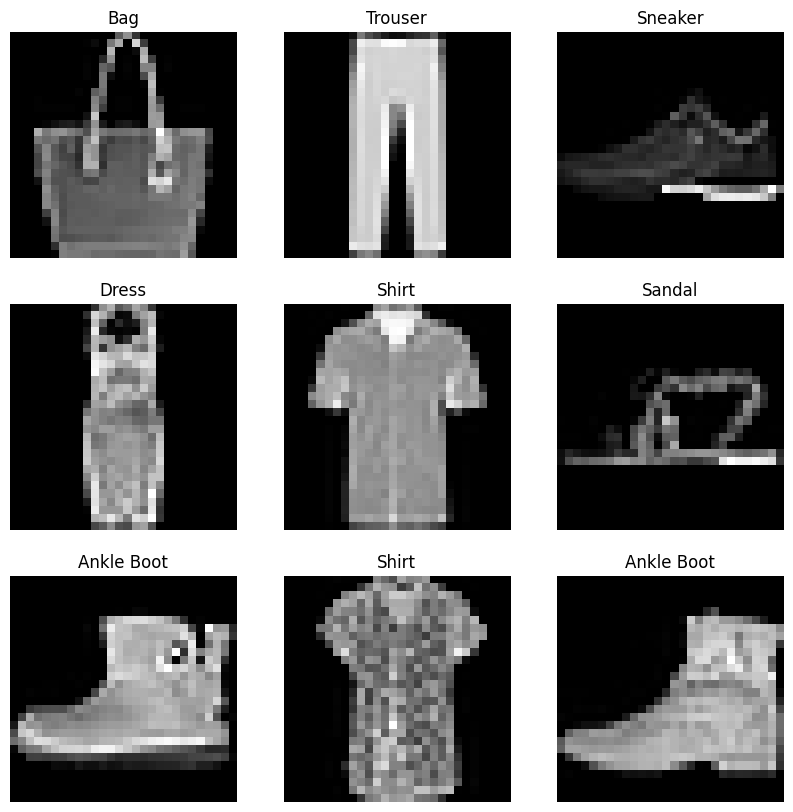

In [53]:
labels_map = {
    0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot",
}

figure = plt.figure(figsize=(10, 10))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    # 随机选一个索引
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    # img 是 [1, 28, 28]，imshow 需要 [28, 28]，所以用 squeeze() 压掉那个 1
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# 数据下载成功 但是在云端 本地文件夹看不到data文件夹
import os
current_path = os.getcwd()
print(f"当前工作目录 (CWD): {current_path}")

print(f"该目录下的文件列表: {os.listdir(current_path)}")

target_folder = os.path.join(current_path, "data")
if os.path.exists(target_folder):
    print(f"\n✅ 成功找到 data 文件夹！路径是: {target_folder}")
    print(f"data 里面有: {os.listdir(target_folder)}")
else:
    print(f"\n❌ 奇怪，没找到 data 文件夹。")

当前工作目录 (CWD): /content
该目录下的文件列表: ['.config', 'data', 'sample_data']

✅ 成功找到 data 文件夹！路径是: /content/data
data 里面有: ['FashionMNIST']


发现旧的 'data' 文件夹，正在删除...
✅ 删除成功！环境已清理。
当前计算设备: cpu

正在下载数据集...


100%|██████████| 26.4M/26.4M [00:02<00:00, 9.70MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 149kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.85MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 20.1MB/s]



======== 数据集探查 ========
Dataset 对象信息: Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

索引 training_data[0] 返回的类型是: <class 'tuple'>
元组的第一个元素 (图片 Tensor): torch.Size([1, 28, 28])
元组的第二个元素 (标签 Int): 9

正在展示训练集样本...


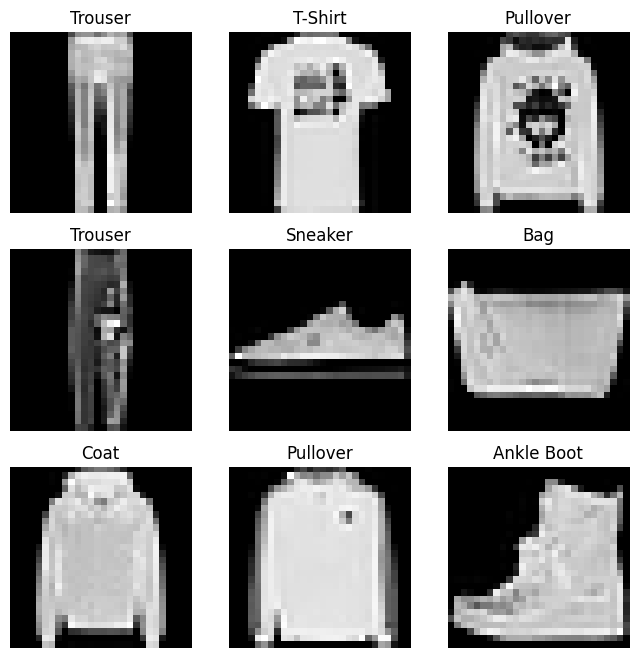


开始训练 (Device: cpu)...
Epoch 1...
Epoch 2...
Epoch 3...
训练完成！

正在展示模型预测结果 (绿色=正确, 红色=错误)...


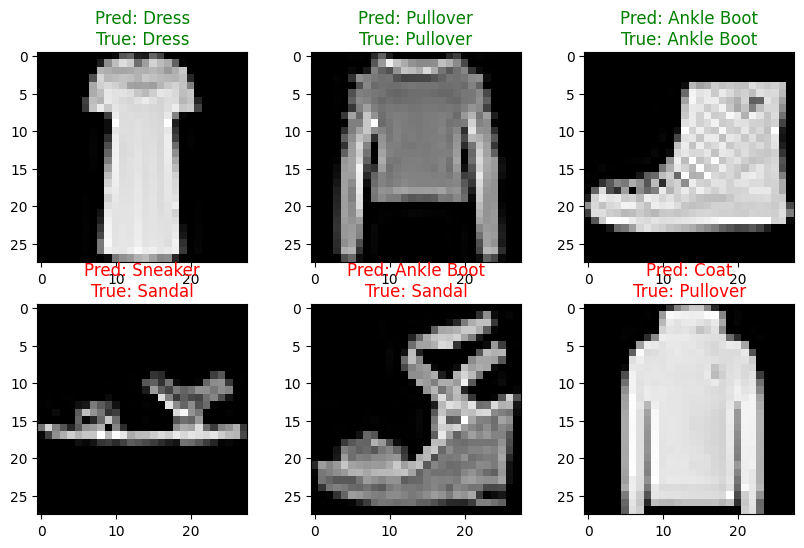

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import shutil # 用于文件操作（删除文件夹）
import os
import random

# ==========================================
# 1. 环境清理：如何删除 data 文件夹？
# ==========================================
folder_path = "data"
if os.path.exists(folder_path):
    print(f"发现旧的 '{folder_path}' 文件夹，正在删除...")
    shutil.rmtree(folder_path) # 递归删除文件夹及其所有内容
    print("✅ 删除成功！环境已清理。")
else:
    print(f"未发现 '{folder_path}' 文件夹，准备下载...")

# ==========================================
# 2. 设备配置
# ==========================================
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"当前计算设备: {device}")

# ==========================================
# 3. 数据准备与探查 (Dataset Inspection)
# ==========================================
print("\n正在下载数据集...")
training_data = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=ToTensor()
)
# 原本 0-255 的像素值被归一化到 [0.0, 1.0] 之间的浮点数。
# 0.0 代表纯黑，1.0 代表纯白
# 图像张量[C, H, W]：如此处Img为(1, 28, 28)
# 1 (C - Channels)：通道数。1 代表单通道，即灰度图。
# 如果是 RGB 彩色图，这里会是 3。
# 28 (H - Height)：图像的高度为 28 像素。
# 28 (W - Width)：图像的宽度为 28 像素

# --- Dataset 到底长什么样？---
print("\n======== 数据集探查 ========")
print(f"Dataset 对象信息: {training_data}") 
# 打印 dataset 会显示它的类名、数据量、根目录和变换操作

print(f"\n索引 training_data[0] 返回的类型是: {type(training_data[0])}")
# 答案：是一个元组 <class 'tuple'>

img, label = training_data[0]
print(f"元组的第一个元素 (图片 Tensor): {img.shape}") # [1, 28, 28]
print(f"元组的第二个元素 (标签 Int): {label}")       # 例如 9

# 定义标签映射表（把数字变成人话）
labels_map = {
    0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot",
}

# ==========================================
# 4. 数据可视化 (Visualization)
# ==========================================
def visualize_samples(dataset, rows=3, cols=3):
    figure = plt.figure(figsize=(8, 8))
    # 随机选 9 张图
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(dataset), size=(1,)).item() # 整数张量化为普通整数
        img, label = dataset[sample_idx]
        
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        # img 是 [1, 28, 28]张量，imshow 需要 [28, 28]的矩阵
        # tensor.squeeze() 会把形状中为 1 的维度去掉
        #  img.squeeze(0)去掉第 0 个维度，前提是这个维度的长度必须为 1
        # unsqueeze(dim) 插入长度为1新维度
        # 把单张图片 [1, 28, 28] 喂给模型时，
        # 模型通常要求输入是 [Batch_Size, C, H, W]。
        # 要用 img.unsqueeze(0) 将其变成 [1, 1, 28, 28]
        plt.imshow(img.squeeze(), cmap="gray") 
    print("\n正在展示训练集样本...")
    plt.show()

visualize_samples(training_data) # 弹出一张图

# ==========================================
# 5. 模型定义与训练 (Model & Training)
# ==========================================
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 10) # 简化一下，两层即可
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# 快速训练 3 轮
print(f"\n开始训练 (Device: {device})...")
for t in range(3):
    print(f"Epoch {t+1}...")
    train(train_dataloader, model, loss_fn, optimizer)
print("训练完成！")

# ==========================================
# 6. 预测结果可视化 (Prediction Visualization)
# ==========================================
def visualize_predictions(model, dataset, num_samples=6):
    model.eval() # 固定住 Dropout 和 BatchNorm 层 评估模式
    figure = plt.figure(figsize=(10, 6))
    cols, rows = 3, 2
    
    with torch.no_grad(): # 预测时不需要计算梯度，节省内存
        for i in range(1, cols * rows + 1):
            # 随机取一张测试图
            sample_idx = torch.randint(len(dataset), size=(1,)).item()
            x, y = dataset[sample_idx] # x图片[1, 28, 28]，y真实标签如9
            
            # 预测需要增加 batch 维度 [1, 1, 28, 28] 模型只吃批次数据
            x_input = x.unsqueeze(0).to(device) # [1, 1, 28, 28]
            pred = model(x_input) # [1, 10] 10个类别的分数 logits 如: [[-2.1, 3.5, 0.1, ...]]
            predicted_label = pred.argmax(1).item()
            # 在第1维度（那 10 个分数的维度）找最大值的索引，如tensor([1])
            
            # 绘图 灰度图
            figure.add_subplot(rows, cols, i) # 网格（子图）当前画第i个，从1开始
            color = "green" if predicted_label == y else "red" # 预测对绿色，错红色
            plt.title(f"Pred: {labels_map[predicted_label]}\nTrue: {labels_map[y]}", color=color)
            plt.axis("off") # 关闭坐标轴 x是图片张量 [1, 28, 28] 图片是 $28 \times 28$ 像素的
            plt.imshow(x.squeeze(), cmap="gray") # imshow 需要 [28, 28] 将数值矩阵渲染为图像
            
    print("\n正在展示模型预测结果 (绿色=正确, 红色=错误)...")
    plt.show()

# 看看模型考了多少分
visualize_predictions(model, test_data)

# logits是模型最后输出的原始分数 (未经过归一化或激活函数处理)
# 数值越大，模型认为输入属于该类别的可能性越高
# 通过对logits应用softmax函数，将这些分数转换为概率分布 Pi=e^zi/Σe^zj
# 其中zi是某类别的logit，Σe^zj是所有类别logits的指数和
# 概率值介于0和1之间，且所有类别的概率和为1


In [ ]:
# 保存模型参数
# 通常不保存整个模型对象，而是保存模型的 state_dict（状态字典）。
# 字典，映射了每一层与其对应的参数张量
device = "cuda" if torch.cuda.is_available() else "cpu"
# 训练完后，保存模型参数
# 运行 torch.save 时，文件保存在Colab 的云端虚拟机硬盘
# （即 /content/ 目录下）。
# 它不会自动同步到电脑，也不会自动同步到Google Drive 文件夹

model_path = "fashion_mnist_model.pth"
torch.save(model.state_dict(), model_path)
print(f"\n模型参数已保存到 {model_path}\n")


# 加载模型参数 先创建一个相同结构的模型实例 然后加载参数（权重）
new_model = NeuralNetwork().to(device)

# map_location 确保 如果你之前在 GPU 保存，现在在 CPU 也能打开
weights = torch.load("fashion_mnist_model.pth", map_location=device)
# weights 是一个 state_dict 字典

# 3. 将权重加载到模型中
new_model.load_state_dict(weights)

# 4. 记得切换到评估模式
new_model.eval()
print("✅ 模型加载成功，可以开始预测了！")



模型参数已保存到 fashion_mnist_model.pth

✅ 模型加载成功，可以开始预测了！


In [ ]:
# 先把模型权重保存到我电脑本地，然后再上传到google drive
# 用colab没法下载到我电脑本地，无语。那就把这个ipynb文件上传到colab

找到文件 fashion_mnist_model.pth，正在启动下载任务...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>